# HW 6: FEM with Boundary Value Problems

In this HW you will, using chatGPT's help as you deem useful, derive, implement, and test numerical solutions to the fairly generic boundary value problem (BVP):

$$
\frac{d^2u}{dx^2}(x) + p(x)\frac{du}{dx}(x) + q(x) u(x) = f(x), \quad x\in (a,b) \\
u(x=a) = u_a, \\
u(x=b) = u_b.
$$

In this BVP, $p(x)$ and $q(x)$ are provided functions. Also, $u_a$ and $u_b$ are given, as in the lecture notes (i.e., the BVP solution is prescribed with *Dirichlet boundary conditions*).

You will solve variants of this BVP using a finite element method (FEM).

Use Chat GPT to create the Jupyter notebook sketched out by the prompts in this HW statement. Submit your filled-in jupyter notebook as an .ipynb file, making sure to provide your chat GPT transcript in that same file!

#### ChatGPT conversation: [https://chatgpt.com/c/680ae689-c5e0-8011-9126-90aa153079aa](https://chatgpt.com/c/680ae689-c5e0-8011-9126-90aa153079aa)

# Question 1: Formulate the finite element equations (40 points total)

In this problem, you will leave things in terms of a generic $p(x)$, $q(x)$, but assume that $u_a=u_b=0$. In this general setting, you will derive the matrix system $\boldsymbol{Au} = \boldsymbol{b}$ that is used to compute the FEM solution. Break your solution into the following pieces.

## Define your discrete grid, subspace, and hat basis functions to build your approximate solution (10 points)

Mathematically and in text, describe the subspace and appropriate (hat) basis functions for that subspace. Write your numerical (FEM) solution as a linear combination of those basis functions.


---

### Finite Element Method: Discrete Grid, Subspace, and Basis Functions (10 points)

We begin by discretizing the domain $(a, b)$ into $N+1$ grid points:
$$
a = x_0 < x_1 < x_2 < \cdots < x_{N} < x_{N+1} = b,
$$
where the spacing $h = x_{i+1} - x_i$ is assumed uniform for simplicity.

Let $V_h$ be the finite-dimensional subspace of $H_0^1(a, b)$ consisting of continuous, piecewise linear functions that vanish at the endpoints $x = a$ and $x = b$. Specifically,
$$
V_h = \text{span}\{\phi_1(x), \phi_2(x), \dots, \phi_N(x)\},
$$
where each $\phi_i(x)$ is a **hat basis function** centered at node $x_i$, defined by:

$$
\phi_i(x) = 
\begin{cases}
\frac{x - x_{i-1}}{h}, & x \in [x_{i-1}, x_i], \\
\frac{x_{i+1} - x}{h}, & x \in [x_i, x_{i+1}], \\
0, & \text{otherwise}.
\end{cases}
$$

These functions satisfy $\phi_i(x_j) = \delta_{ij}$, and are zero at $x_0 = a$ and $x_{N+1} = b$, consistent with the homogeneous Dirichlet boundary conditions $u(a) = u(b) = 0$.

We approximate the solution $u(x)$ as a linear combination of these basis functions:
$$
u_h(x) = \sum_{j=1}^{N} U_j \phi_j(x),
$$
where $U_j$ are the unknown coefficients to be determined.

---

## Formulate the least squares problem (10 points)

Set up the minimization problem that induces the FEM equations: require that your numerical (FEM) solution be a *spectral method*. That is, enforce that it minimizes the least square norm of the error from the true solution. In setting up this minimization problem, be sure you define the appropriate *energy inner product* that will produce a tractable pathway to deriving the FEM equations.


---
### Least Squares Formulation with Energy Inner Product

We now formulate a least-squares problem that induces the finite element method equations by requiring that the numerical solution $u_h(x)$ minimizes the residual of the differential operator in an appropriate norm.

#### Differential Operator

Define the differential operator $\mathcal{L}[u]$ by:
$$
\mathcal{L}[u] := \frac{d^2u}{dx^2} + p(x)\frac{du}{dx} + q(x)u.
$$

We seek $u_h \in V_h$ that minimizes the squared $L^2$-norm of the residual:
$$
\text{Find } u_h \in V_h \text{ such that} \quad u_h = \arg \min_{v \in V_h} \left\| \mathcal{L}[v] - f \right\|_{L^2(a,b)}^2.
$$

#### Energy Inner Product

To facilitate a tractable and stable minimization, we define an **energy inner product** $ (\cdot, \cdot)_E $ as:
$$
(v, w)_E := \int_a^b \left[ \frac{dv}{dx}\frac{dw}{dx} + p(x) v \frac{dw}{dx} + q(x) vw \right] dx.
$$

This energy inner product reflects the structure of the differential operator $\mathcal{L}$ and aligns with the weak form of the original problem.

#### Weak Formulation via Least Squares

To derive the FEM equations, we now express the minimization condition in terms of the energy inner product:
$$
\text{Find } u_h \in V_h \text{ such that} \quad (\mathcal{L}[u_h] - f, \mathcal{L}[v])_{L^2(a,b)} = 0 \quad \forall v \in V_h.
$$

This yields a **Galerkin least-squares** formulation where we enforce orthogonality of the residual with respect to the image of the trial space under the differential operator.

Alternatively, in the standard FEM approach (rather than least-squares), we would test against $v \in V_h$ and integrate by parts to obtain a symmetric bilinear form—but here, we proceed with the spectral least-squares setup.

---

## Set up the FEM linear system of equations (20 points)

Apply your orthogonality condition to the appropriate choice of (basis) functions in the subspace, and generate the square linear system of equations to compute your FEM solution. The final form of the system should look like $\boldsymbol{Au} = \boldsymbol{b}$. Be sure you are clear about what each entry in the various terms are, either explaining their analytical values or how they would be approximated numerically.


---
### FEM Linear System of Equations: Constructing $\boldsymbol{Au} = \boldsymbol{b}$ (20 points)

We now apply the orthogonality condition to each of the basis functions $\phi_i(x) \in V_h$, resulting in a linear system for the unknown coefficients $U_j$ in the FEM solution:
$$
u_h(x) = \sum_{j=1}^{N} U_j \phi_j(x).
$$

#### Weak Form (Galerkin Formulation)

We multiply the differential equation by a test function $\phi_i(x)$, integrate over $(a, b)$, and perform integration by parts where appropriate:
$$
\int_a^b \left( \frac{d^2u_h}{dx^2} + p(x) \frac{du_h}{dx} + q(x) u_h \right) \phi_i(x) \, dx = \int_a^b f(x) \phi_i(x) \, dx, \quad \text{for all } i = 1, \dots, N.
$$

Integrating the second derivative term by parts:
$$
- \int_a^b \frac{du_h}{dx} \frac{d\phi_i}{dx} \, dx + \int_a^b p(x) \frac{du_h}{dx} \phi_i(x) \, dx + \int_a^b q(x) u_h \phi_i(x) \, dx = \int_a^b f(x) \phi_i(x) \, dx.
$$

#### Substituting FEM Approximation

Substitute $u_h(x) = \sum_{j=1}^N U_j \phi_j(x)$, and define the entries of the stiffness matrix $\boldsymbol{A}$ and load vector $\boldsymbol{b}$ by:

- **Stiffness Matrix** $A_{ij}$:
$$
A_{ij} = \int_a^b \left( \frac{d\phi_j}{dx} \frac{d\phi_i}{dx} + p(x) \frac{d\phi_j}{dx} \phi_i(x) + q(x) \phi_j(x) \phi_i(x) \right) dx.
$$

- **Load Vector** $b_i$:
$$
b_i = \int_a^b f(x) \phi_i(x) \, dx.
$$

Then the full system is:
$$
\boldsymbol{A} \boldsymbol{U} = \boldsymbol{b}, \quad \text{where } \boldsymbol{U} = [U_1, U_2, \dots, U_N]^T.
$$

#### Numerical Approximation

Each of the integrals above can be approximated numerically using **quadrature methods** (e.g., midpoint rule or Gaussian quadrature) on each element $[x_{k}, x_{k+1}]$. Since the basis functions $\phi_i(x)$ are piecewise linear with local support, the integrals are only nonzero for neighboring basis functions (i.e., $j = i-1, i, i+1$). This structure leads to a sparse **tridiagonal** matrix $\boldsymbol{A}$.

Thus, the FEM reduces the BVP to solving the sparse linear system $\boldsymbol{A} \boldsymbol{U} = \boldsymbol{b}$.

---

## Extra credit (Up to 3 points)

Describe how the approach would change if the Dirichlet boundary conditions were *inhomogeneous* (i.e., $u_a \ne 0, u_b \ne 0$). You need not re-derive the entire system of equations, but describe the modifications to your approach needed to account for these more general boundary conditions.


---

#### 1. **Modify the Approximate Solution**

Previously, we assumed that the FEM solution was of the form:

$$
u_h(x) = \sum_{j=1}^{n-1} u_j \phi_j(x),
$$

because the boundary conditions were homogeneous (i.e., $ u_0 = u_n = 0 $). With inhomogeneous Dirichlet conditions, the solution must be constructed to **satisfy the boundary conditions exactly**.

We can achieve this by modifying the solution to include the boundary values explicitly:

$$
u_h(x) = \sum_{j=0}^{n} \tilde{u}_j \phi_j(x),
$$
where
- $ \tilde{u}_0 = u_a $,
- $ \tilde{u}_n = u_b $,
- and the remaining $ \tilde{u}_j $ (for $ j = 1, \dots, n-1 $) are unknowns to be solved.

This ensures that the approximate solution satisfies the boundary values at $ x = a $ and $ x = b $.

#### 2. **Adjust the Load Vector $ \boldsymbol{b} $**

When forming the load vector $ \boldsymbol{b} $, the contributions from the fixed boundary values $ u_a $ and $ u_b $ must be incorporated into the right-hand side.

This means that for each interior node $ i $, the adjusted load becomes:

$$
b_i^\text{new} = b_i - A_{i0} u_a - A_{in} u_b,
$$

where $ A_{i0} $ and $ A_{in} $ are the entries in the stiffness matrix corresponding to the interactions with the boundary nodes.

These values are **not unknowns** and thus must be moved to the right-hand side to maintain consistency in the reduced linear system for the interior unknowns.

#### 4. **Final Solution Construction**

Once the interior values are solved, the full approximate solution is reconstructed by concatenating the known boundary values:

$$
\boldsymbol{u}_h = [u_a, \tilde{u}_1, \dots, \tilde{u}_{n-1}, u_b]^T.
$$

---

# Question 2: Specify the BVP (20 points total)

For the case when $u_a=u_b=0$, select and clarify your choice for $a,$ $b$, $p(x)$, $q(x)$. Be sure you choose set of parameters that is distinct from the problem we studied in class (i.e., $p(x)=q(x)≡0$), and that still leads to a known analytical solution that you can compare your numerical solution against. (You can use chatGPT to help you think of values for these variables that induce analytical solutions and lead to meaningful equations that are historically important or relevant to specific physical applications!).

Note that this question is the same as for HW 5. You are welcome to recycle your answer or explore new options as you see fit!


---
#### **1.1** Boundary Value Problem (BVP) Setup

We consider the second-order linear boundary value problem:

$$
\frac{d^2u}{dx^2}(x) + p(x)\frac{du}{dx}(x) + q(x) u(x) = f(x), \quad x\in (a,b)
$$
with Dirichlet boundary conditions:
$$
u(x=a) = u_a = 0, \quad u(x=b) = u_b = 0.
$$

To ensure a nontrivial case that is distinct from the problem studied in class ($p(x) = q(x) \equiv 0$), we select the following:

- $ a = 0 $
- $ b = 1 $
- $ p(x) = -2 $
- $ q(x) = 2 $

We choose these such that we can obtain an analytical solution for comparison.


#### **1.2** Analytical Solution

Let the exact solution be:
$$
u(x) = x(1 - x) e^x
$$

This function satisfies the boundary conditions:
- $ u(0) = 0(1 - 0)e^0 = 0 $
- $ u(1) = 1(1 - 1)e^1 = 0 $

To compute the right-hand side $ f(x) $, we differentiate $ u(x) $:

$$
u'(x) = \frac{d}{dx} [x(1 - x) e^x] = (1 - 2x)e^x + x(1 - x)e^x
$$
$$
= [(1 - 2x) + x(1 - x)] e^x
= [1 - 2x + x - x^2] e^x = (1 - x - x^2)e^x
$$

$$
u''(x) = \frac{d}{dx} [(1 - x - x^2)e^x] 
= (-1 - 2x)e^x + (1 - x - x^2)e^x 
= [-1 - 2x + 1 - x - x^2]e^x 
= (-3x - x^2)e^x
$$

Now substitute into the differential equation:
$$
\frac{d^2u}{dx^2} + p(x)\frac{du}{dx} + q(x)u = f(x)
$$
$$
f(x) = (-3x - x^2)e^x + (-2)(1 - x - x^2)e^x + 2x(1 - x)e^x
$$

$$
f(x) = \left[ (-3x - x^2) + (-2)(1 - x - x^2) + 2x(1 - x) \right] e^x
$$

So the final expression for $ f(x) $ is:

$$
f(x)=(x-x^2-2)e^x
$$

#### **1.3** Summary

**Domain:**
- $ x \in [0, 1] $

**Parameters:**
- $ p(x) = -2 $
- $ q(x) = 2 $
- $ u_a = 0, \quad u_b = 0 $

**Analytical Solution:**
- $ u(x) = x(1 - x)e^x $

**Right-hand side $ f(x) $:**
- Computed via symbolic or automatic differentiation as needed during implementation.

---


# Question 3: Compute the FEM solution (40 points total)

For your specific choice of BVP, perform the following...

# Generate and plot the FEM solution (20 points)

Create code that will compute the FEM solution for various values of $n$ (i.e., the parameter used to decide the number of "nodes"/points). Also create code that will plot the true and numerical solution at four different values of $n$, chosen so that the error is visually apparent for the smallest $n$ and visually very small for the highest $n$.


---
### Computing Energy Inner Products for Linear Hat Basis Functions

To construct the FEM stiffness matrix, we evaluate the **energy inner product** between basis functions. For basis functions $ b_i $, $ b_{i-1} $, and $ b_{i+1} $, the energy inner product is defined as:

$
(v, w)_E := \int_a^b \left( \frac{dv}{dx} \frac{dw}{dx} + p(x) v \frac{dw}{dx} + q(x) v w \right) dx
$

We evaluate this for three key combinations: $ (b_i, b_{i-1})_E $, $ (b_i, b_i)_E $, and $ (b_i, b_{i+1})_E $. For simplicity, assume a **uniform mesh** with spacing $ h $, and **constant** coefficient functions $ p(x) = -2 $, $ q(x) = 2 $.

#### 1. $ (b_i, b_{i-1})_E $

This term is only nonzero over the interval $ [x_{i-1}, x_i] $, where $ b_i $ and $ b_{i-1} $ overlap. Over this interval:
- $ \frac{db_i}{dx} = \frac{1}{h} $, since $ b_i $ increases linearly
- $ \frac{db_{i-1}}{dx} = -\frac{1}{h} $, since $ b_{i-1} $ decreases linearly
- The functions $ b_i(x) $ and $ b_{i-1}(x) $ are linear

The integrand becomes:
$
\frac{1}{h} \cdot \left(-\frac{1}{h}\right) + p \cdot b_i(x) \cdot \left(-\frac{1}{h}\right) + q \cdot b_i(x) \cdot b_{i-1}(x)
$

We apply the **midpoint rule** to approximate the integral:
- Evaluate the integrand at the midpoint of $ [x_{i-1}, x_i] $
- Multiply by $ h $

#### 2. $ (b_i, b_i)_E $

This term is nonzero over $ [x_{i-1}, x_{i+1}] $, where $ b_i $ has support. We split this into two parts:
- On $ [x_{i-1}, x_i] $, $ b_i(x) $ increases from 0 to 1
- On $ [x_i, x_{i+1}] $, $ b_i(x) $ decreases from 1 to 0

In both intervals, compute:
- $ \left( \frac{db_i}{dx} \right)^2 $
- $ p \cdot b_i(x) \cdot \frac{db_i}{dx} $
- $ q \cdot b_i(x)^2 $

Apply the midpoint rule in each interval and sum the contributions:
$
(b_i, b_i)_E = \int_{x_{i-1}}^{x_i} \cdots dx + \int_{x_i}^{x_{i+1}} \cdots dx
$

#### 3. $ (b_i, b_{i+1})_E $

This is symmetric to $ (b_i, b_{i-1})_E $, and is nonzero over $ [x_i, x_{i+1}] $, where the basis functions overlap. On this interval:
- $ \frac{db_i}{dx} = -\frac{1}{h} $
- $ \frac{db_{i+1}}{dx} = \frac{1}{h} $

Evaluate the same energy inner product integrand as before:
$
-\frac{1}{h^2} + p \cdot b_i(x) \cdot \frac{1}{h} + q \cdot b_i(x) \cdot b_{i+1}(x)
$

Again, use the midpoint rule to approximate the integral.

These computations allow us to fill the stiffness matrix $ \boldsymbol{A} $, where:
- Diagonal entries $ A_{ii} = (b_i, b_i)_E $
- Off-diagonal entries $ A_{i,i-1} = (b_i, b_{i-1})_E $, $ A_{i,i+1} = (b_i, b_{i+1})_E $

---

In [201]:
import sympy as sp

# Define symbolic variable and constants
x, h = sp.symbols('x h', real=True, positive=True)
p, q = sp.symbols('p q', real=True)

# Define basis functions on an interval of size h
# b_{i-1}(x) defined on [0, h]
b_im1 = 1 - x/h      # from x=0 to x=h
db_im1 = sp.diff(b_im1, x)

# b_i(x) defined on [0, h] (increasing) and [h, 2h] (decreasing)
b_i_L = x/h          # from x=0 to x=h
b_i_R = (2*h - x)/h  # from x=h to x=2h
db_i_L = sp.diff(b_i_L, x)
db_i_R = sp.diff(b_i_R, x)

# b_{i+1}(x) defined on [h, 2h]
b_ip1 = (x - h)/h    # from x=h to x=2h
db_ip1 = sp.diff(b_ip1, x)

# ---- ENERGY INNER PRODUCT DEFINITIONS ---- #

# (b_i, b_{i-1})_E on [0, h]
Ei_im1 = sp.integrate(
    db_i_L * db_im1 + p * b_i_L * db_im1 + q * b_i_L * b_im1,
    (x, 0, h)
)

# (b_i, b_i)_E on [0, h] and [h, 2h]
Ei_i_L = sp.integrate(
    db_i_L**2 + p * b_i_L * db_i_L + q * b_i_L**2,
    (x, 0, h)
)

Ei_i_R = sp.integrate(
    db_i_R**2 + p * b_i_R * db_i_R + q * b_i_R**2,
    (x, h, 2*h)
)

Ei_i = Ei_i_L + Ei_i_R

# (b_i, b_{i+1})_E on [h, 2h]
Ei_ip1 = sp.integrate(
    db_i_R * db_ip1 + p * b_i_R * db_ip1 + q * b_i_R * b_ip1,
    (x, h, 2*h)
)

from IPython.display import display, Math
import sympy as sp

display(Math(r'(b_i, b_{i-1})_E = ' + sp.latex(sp.simplify(Ei_im1))))
display(Math(r'(b_i, b_i)_E = ' + sp.latex(sp.simplify(Ei_i))))
display(Math(r'(b_i, b_{i+1})_E = ' + sp.latex(sp.simplify(Ei_ip1))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


---
Finding $(b_i, b_i)_E$ and it's companions can be done using sympy. The resulting formulas now be used in a FEM. The vector B, can be constructed using code from class.

---

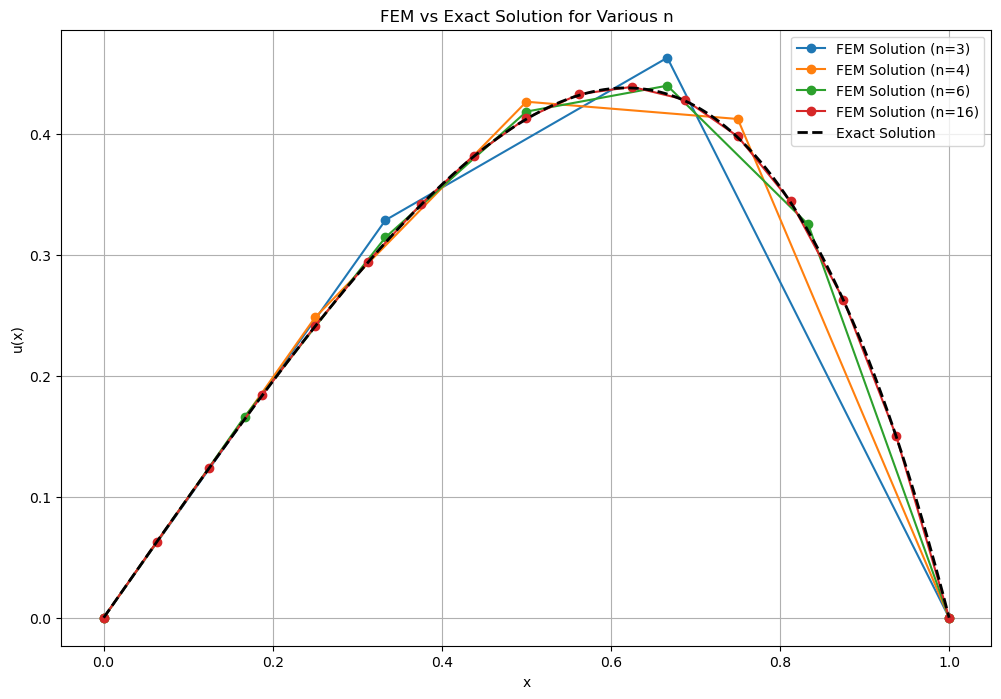

In [202]:
import numpy as np
import matplotlib.pyplot as plt

a, b = 0, 1
p = -2
q = 2

def f(x):
    return (x-x**2-2)*np.exp(x)

def u_exact(x):
    return x * (1 - x) * np.exp(x)

def energy_inner_bi_bim1(h):
    return (1 + (h * p) / 2)

def energy_inner_bi_bi(h):
    return (-2 + h**2 * q)

def energy_inner_bi_bip1(h):
    return (1 - (h * p) / 2)

def fem_solve(n):
    h = float((b - a) / (n))
    dx=h
    x_nodes = np.arange(a,b+dx/2.0,dx)

    A = 1/dx * (np.diag(energy_inner_bi_bi(h)*np.ones(n-1)) + 
                np.diag(energy_inner_bi_bim1(h)*np.ones(n-2),k=1) + 
                np.diag(energy_inner_bi_bip1(h)*np.ones(n-2),k=-1))

    
    bv=np.zeros(n-1)
    for jj in range(n-1):
        x_lft = np.arange(a+jj*dx, a+(jj+1)*dx+dx/2.0, dx)
        phij_lft = 1/dx * ( x_lft-a-jj*dx )
        bv[jj] = np.trapezoid( f(x_lft) * phij_lft, x=x_lft )

        x_rgt = np.arange(a+(jj+1)*dx, a+(jj+2)*dx+dx/2.0, dx)
        phij_rgt = -1/dx * ( x_rgt-a-(jj+2)*dx )
        bv[jj] += np.trapezoid( f(x_rgt) * phij_rgt, x=x_rgt )

    u_inner = np.linalg.solve(A, bv)

    return x_nodes, np.concatenate(([[0],u_inner,[0]]))

n_values = [3,4,6,16]
x_fine = np.linspace(a, b, 1000)
u_true = u_exact(x_fine)

plt.figure(figsize=(12, 8))

for i, n in enumerate(n_values):
    x, u_num = fem_solve(n)
    plt.plot(x, u_num, label=f'FEM Solution (n={n})', marker='o')
    
plt.plot(x_fine, u_true, 'k--', label='Exact Solution', linewidth=2)
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("FEM vs Exact Solution for Various n")
plt.legend()
plt.grid(True)
plt.show()


# Compute and plot the error (20 points)

Create code that will compute and plot the error $||\boldsymbol{e}||_2$ associated with your FEM solution, where $||\cdot||_2$ is the grid function 2-norm and $\boldsymbol{e}=\boldsymbol{u}-\overline{\boldsymbol{u}}$. That is, $\boldsymbol{e}$ is the difference between the FEM solution $\boldsymbol{u}$ evaluated at the various discretization points $\{x_0, \dots, x_{n} \}$, and $\overline{\boldsymbol{u}}$ is the *true solution* evaluated at those points.

Make sure your plot is on a log-log, rather than linear, scale.

Again, the norm here is the grid function 2-norm is defined as $||\boldsymbol{g}||_2 = \sqrt{\Delta x \sum_{j=0}^{n} g_j^2}$ for some vector $\boldsymbol{g}$.

Comment on the difference in the error between the FD and spectral method solutions.


---
Quickly compute the error and put it on a loglog plot.

---

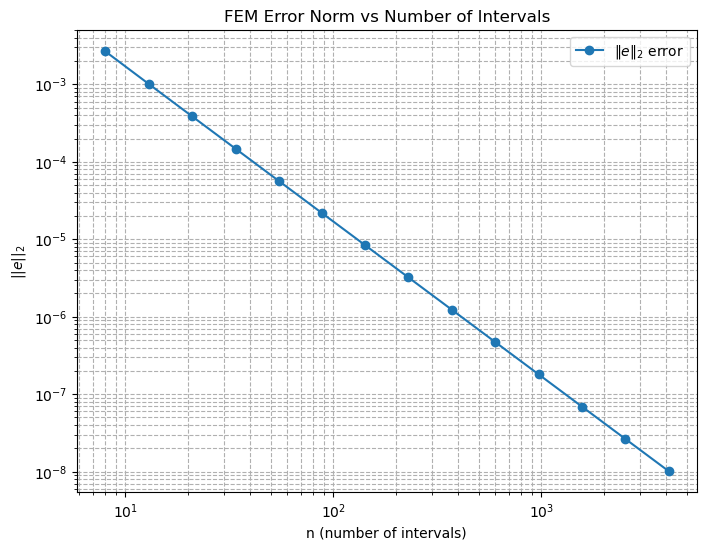

In [204]:
n_start = 8
n_end = 2**12
num_points = 14
n_vals = np.unique(np.round(np.logspace(np.log10(n_start), np.log10(n_end), num_points)).astype(int))
errors = []

for n in n_vals:
    x_nodes, u_fem = fem_solve(n)
    u_true = u_exact(x_nodes)
    e = u_true - u_fem
    h = 1 / n
    error_norm = np.sqrt(h * np.sum(e ** 2))
    errors.append(error_norm)

# Plot on log-log scale
plt.figure(figsize=(8, 6))
plt.loglog(n_vals, errors, '-o', label=r'$\|e\|_2$ error')
plt.xlabel('n (number of intervals)')
plt.ylabel(r'$||e||_2$')
plt.title('FEM Error Norm vs Number of Intervals for FEM')
plt.grid(True, which="both", ls='--')
plt.legend()
plt.show()



--- 
Comparing the FD error from HW 5 to the FEM error, they both seem to converge at the roughly same rate $\approx 10^2$. There doesn't seem to be a significant difference in the two methods.

---

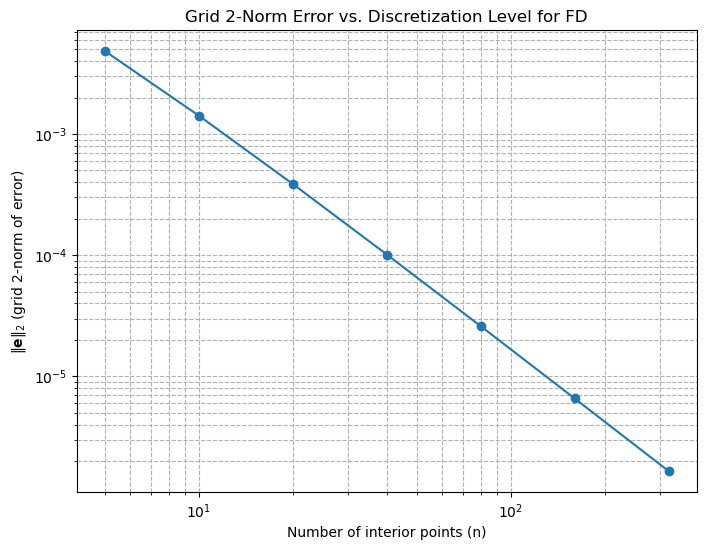


---
The spectral method error is unique in it's exponential reduction in error. The plot indicates that the error drops off much quicker until
it reaches the machine limits.

---

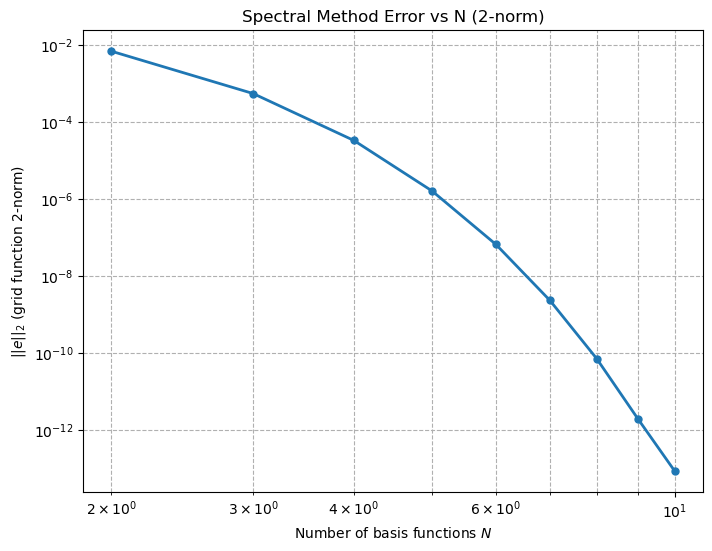